In [1]:
from ABCD.abcd_generation import *

from validation import *
from running_time import *

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
# [OK] varier c_min
# [OK] varier d_max
# [OK] revoir rt sbm
# [OK] integrer ABCD dans validation + running_time

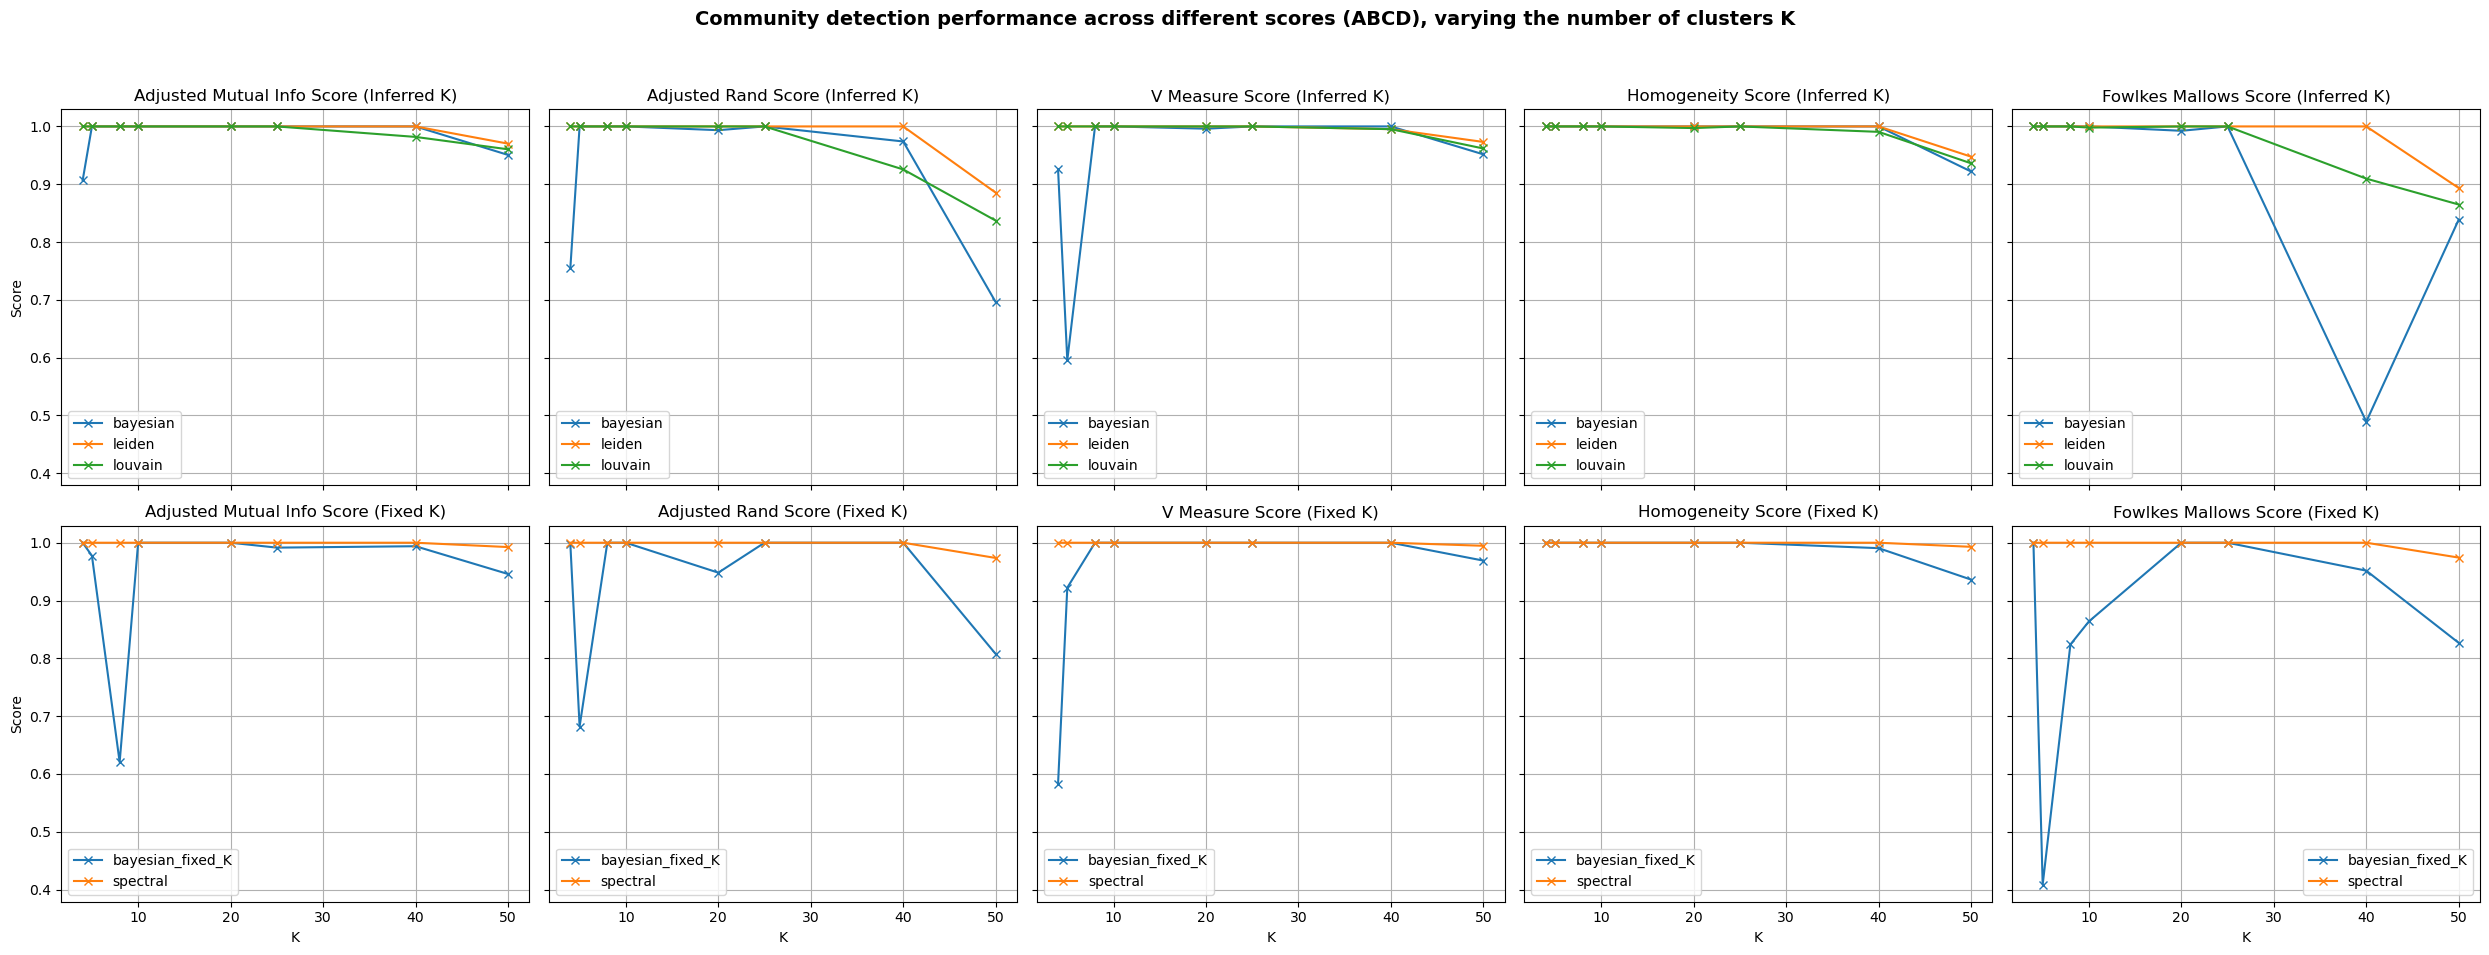

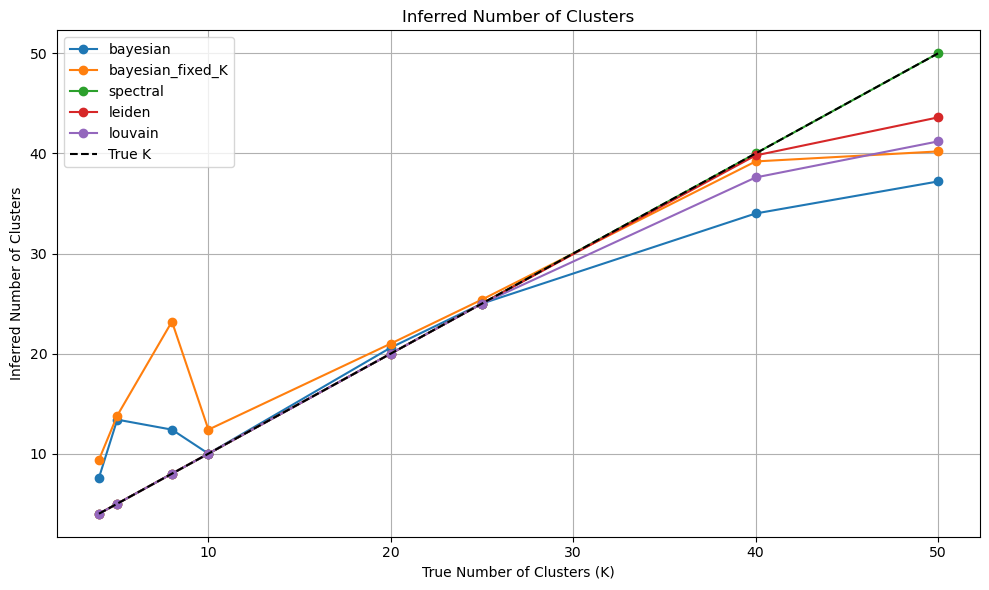

In [3]:
res_mean, nb_clusters = validation_range_K([4, 5, 8, 10, 20, 25, 40, 50], graph_type="abcd")

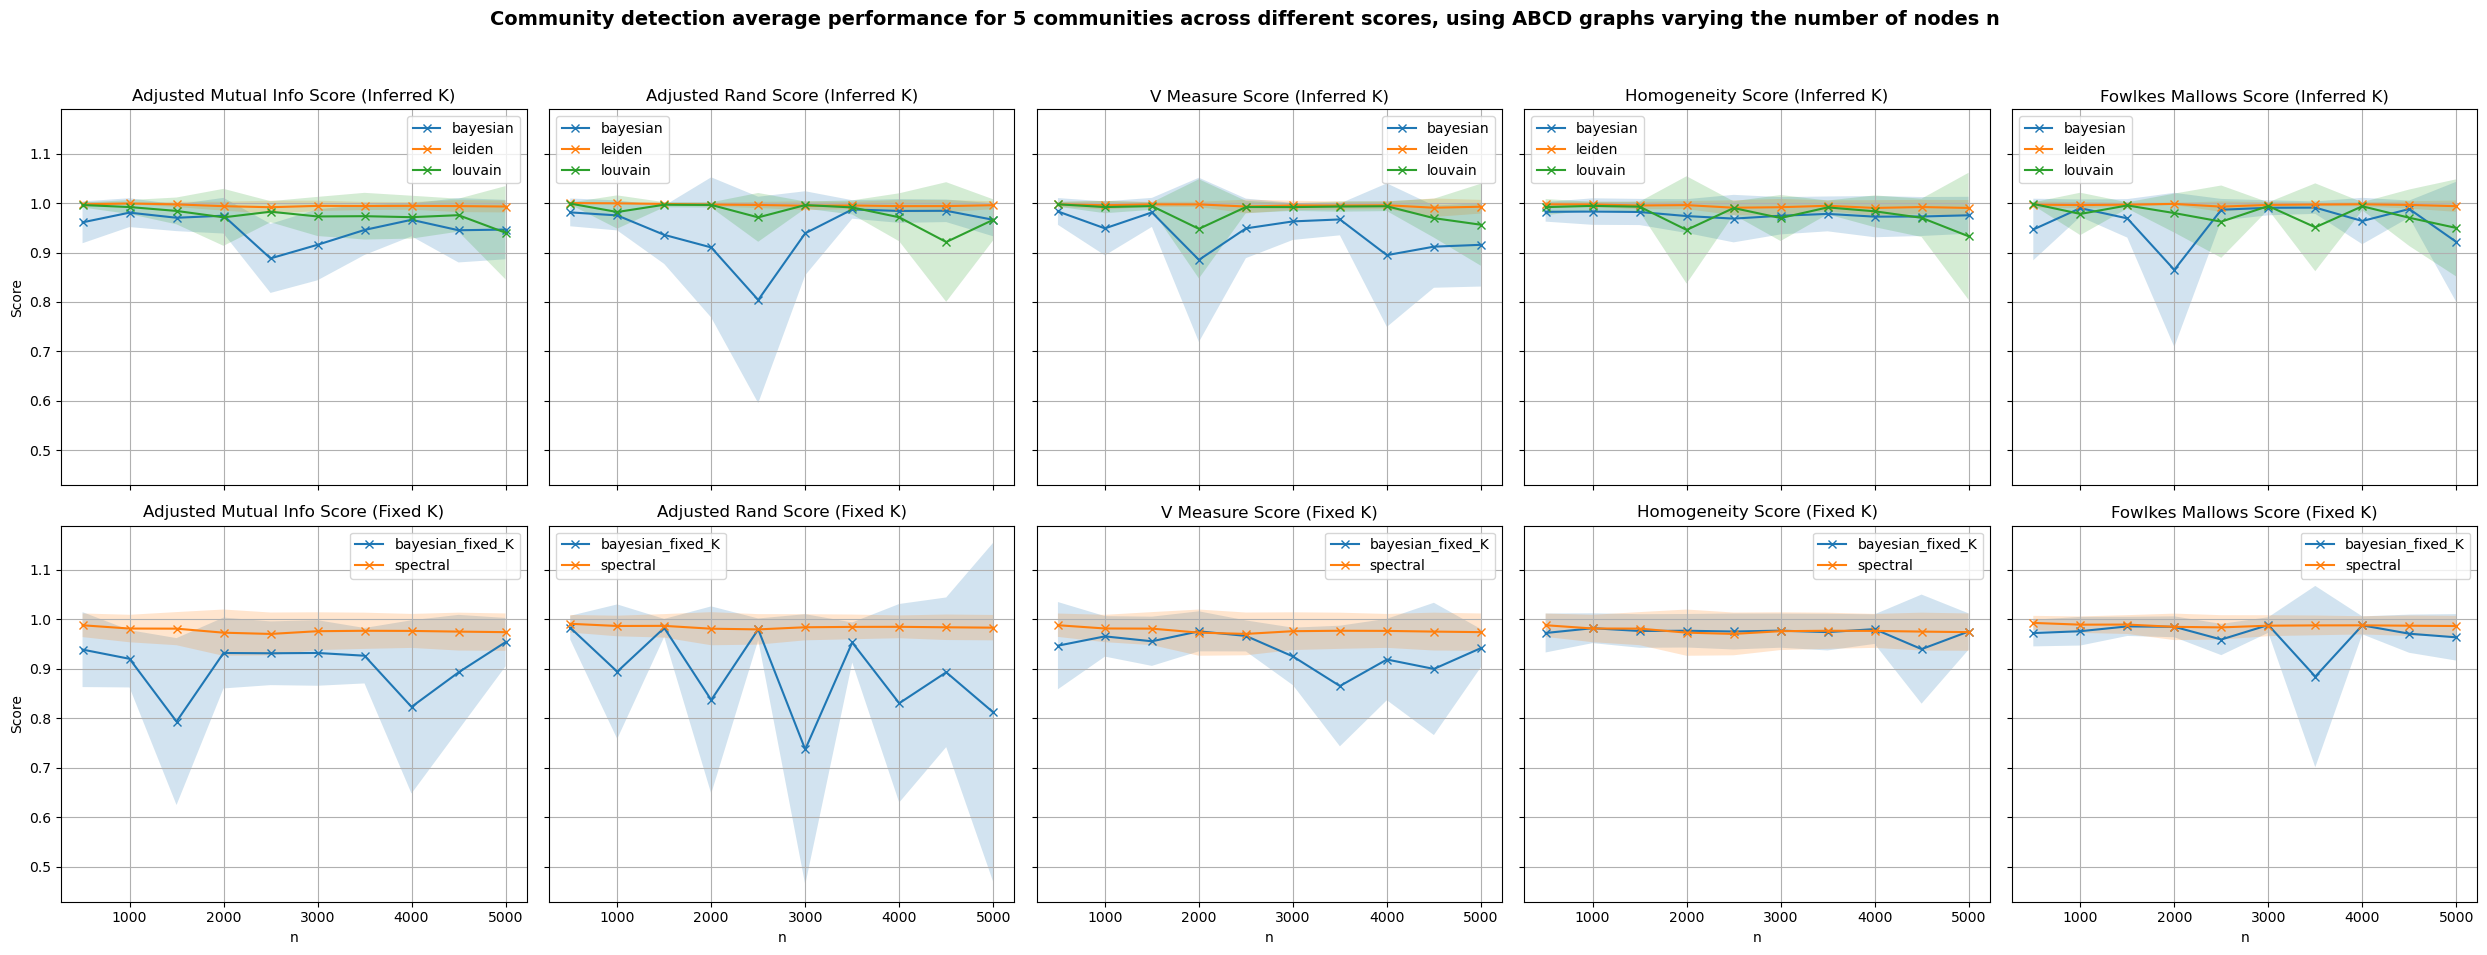

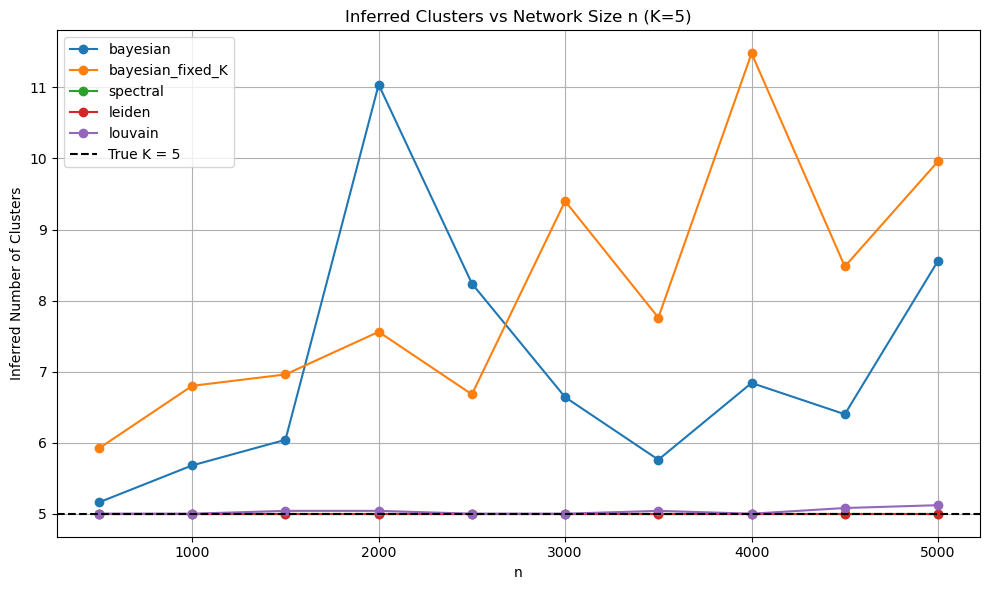

In [4]:
res = validation_range_n(K=5, graph_type="abcd")

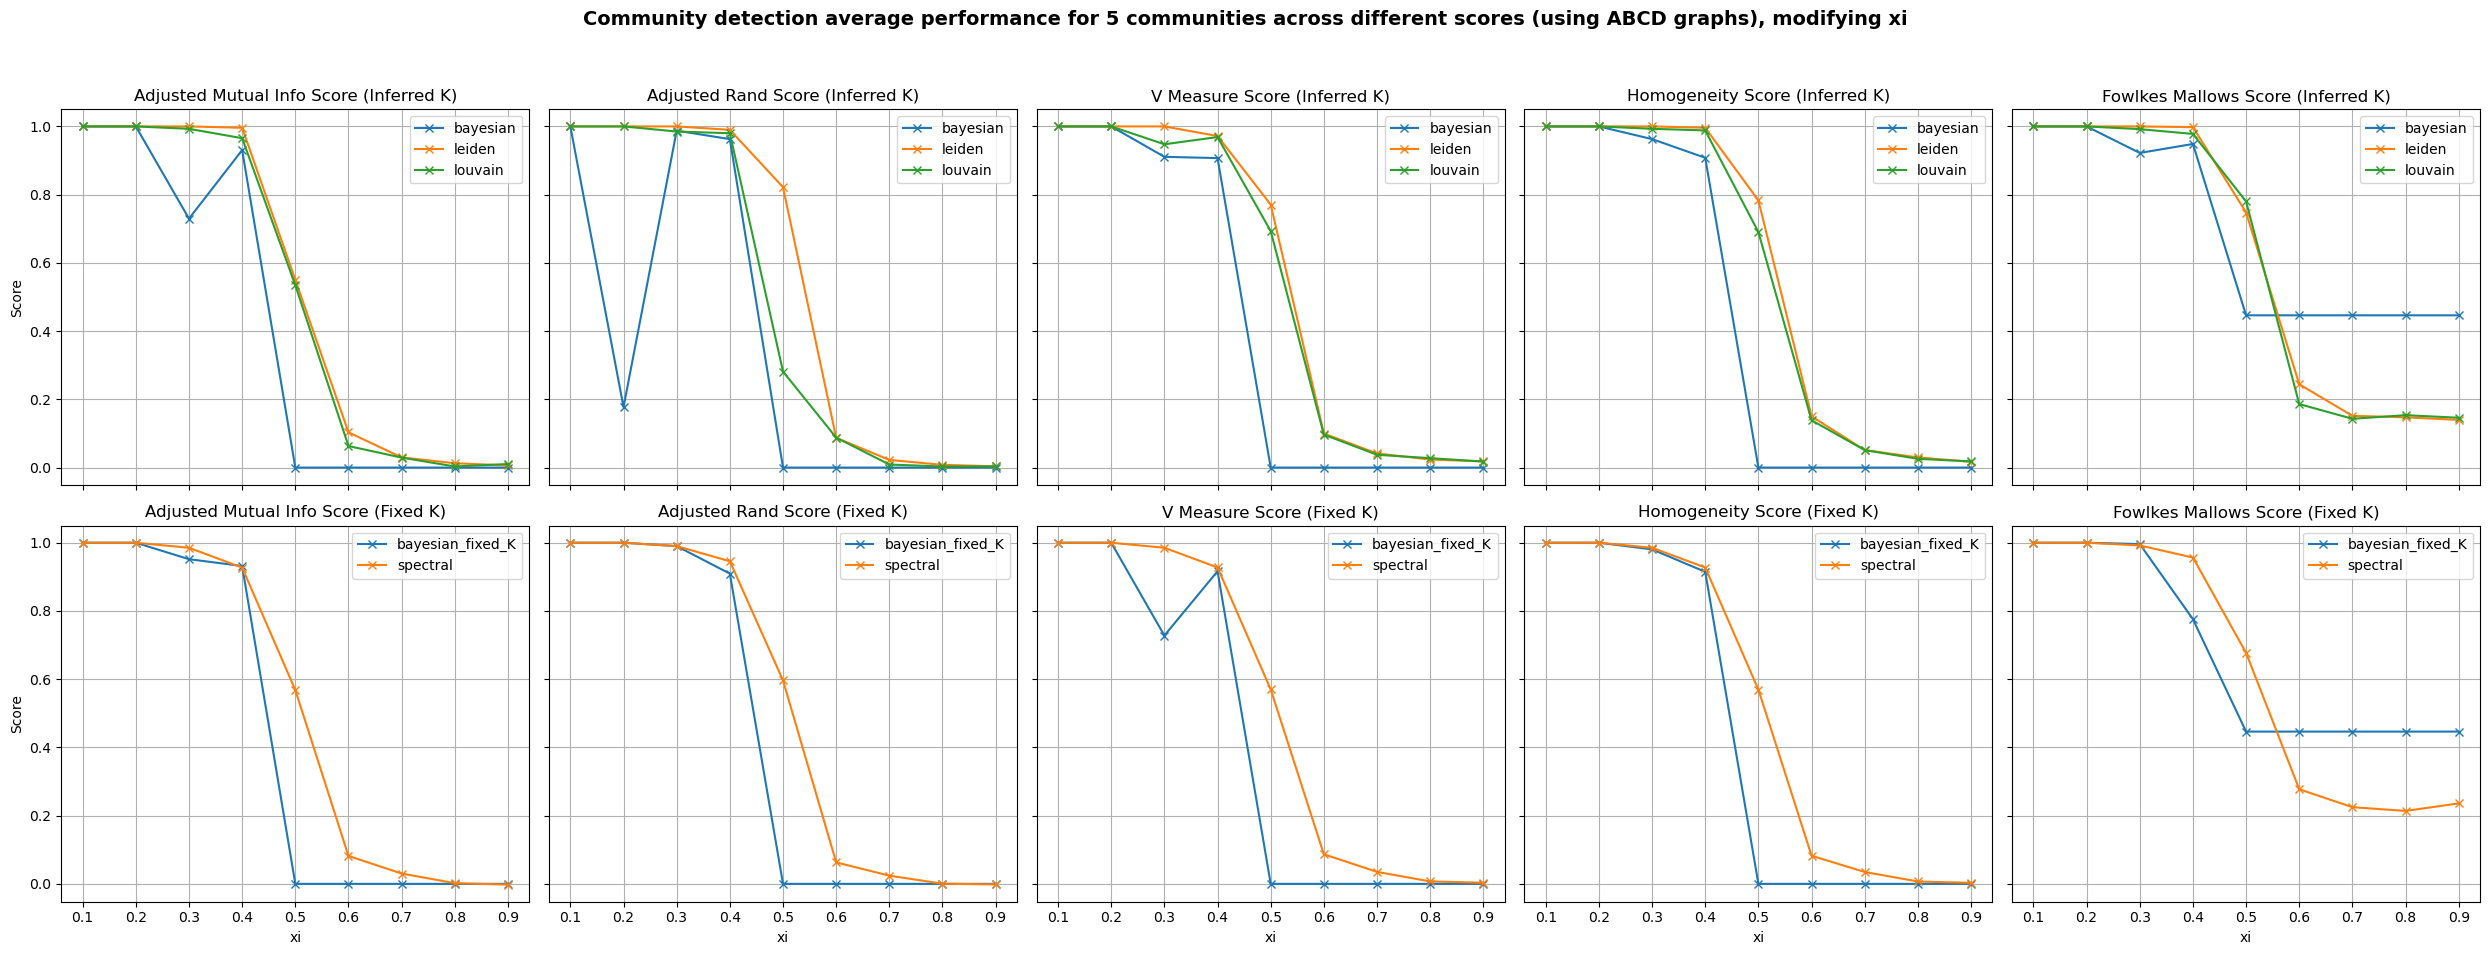

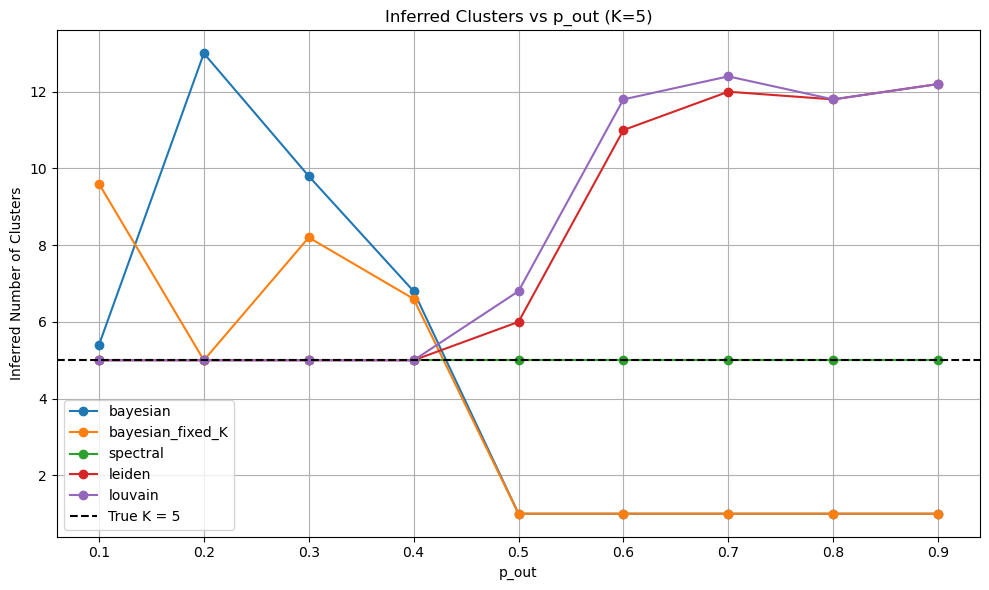

In [5]:
res_p = validation_range_p(K=5, n=1000, graph_type="abcd")

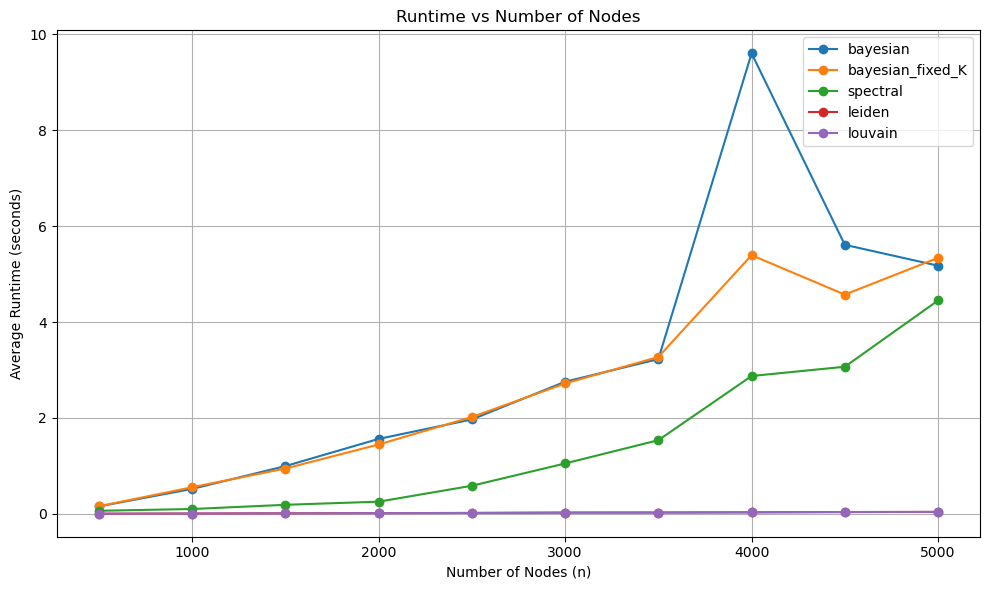

In [6]:
res_rt_vs_n = running_time_vs_n(K=5, graph_type="abcd")

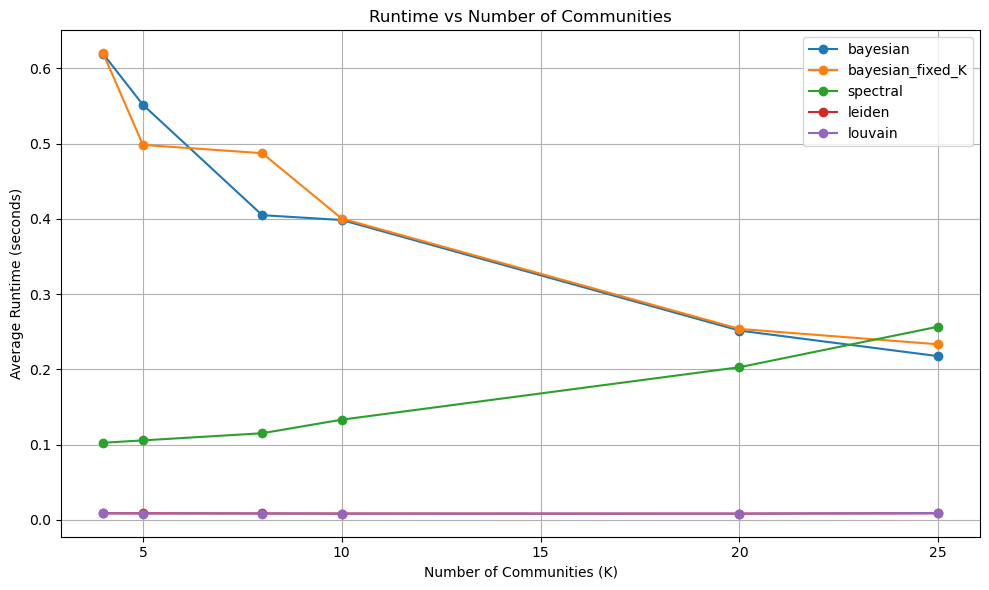

In [7]:
range_K = [4, 5, 8, 10, 20, 25]
res_rt_vs_k = running_time_vs_K(range_K = range_K, graph_type="abcd")

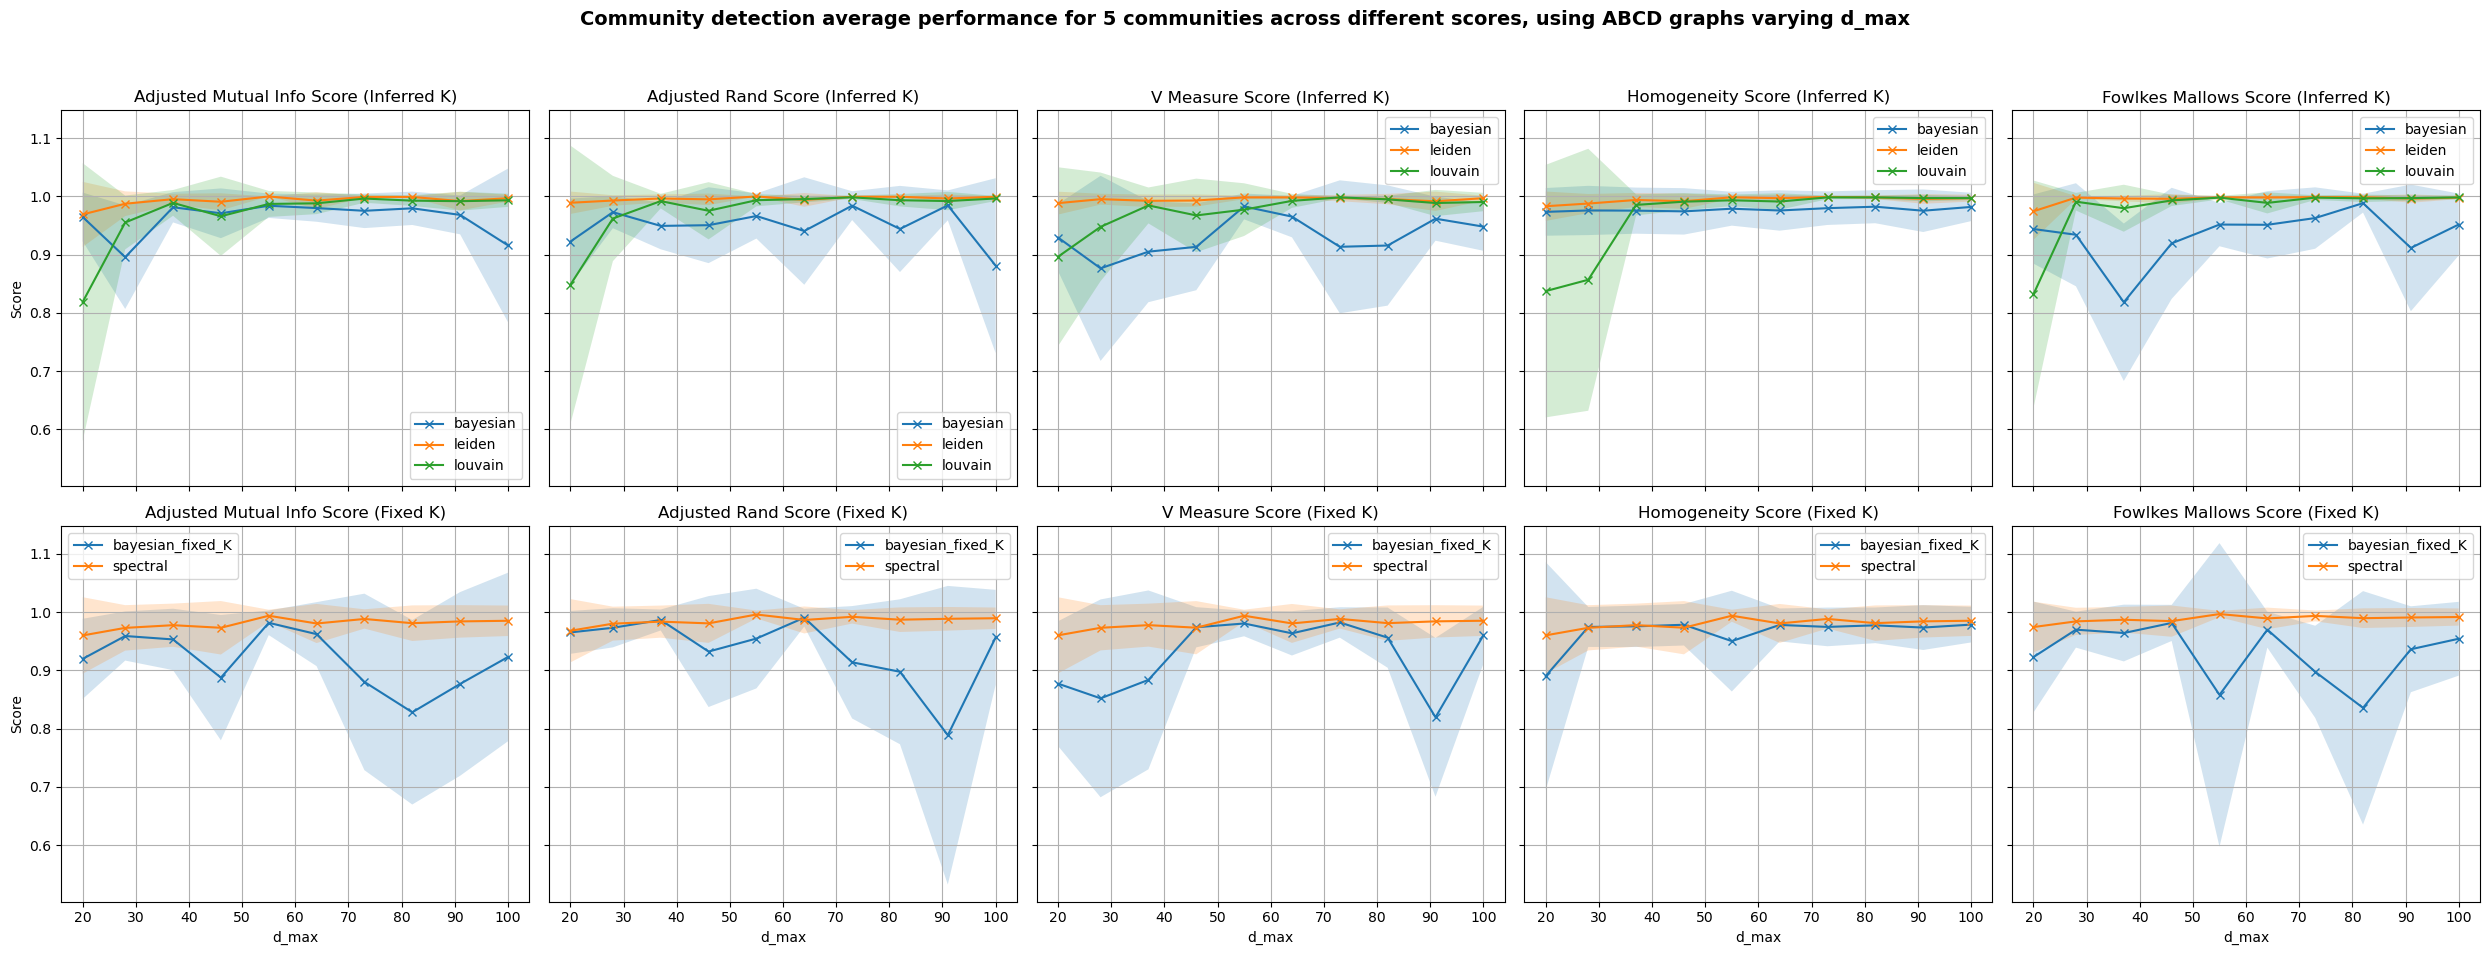

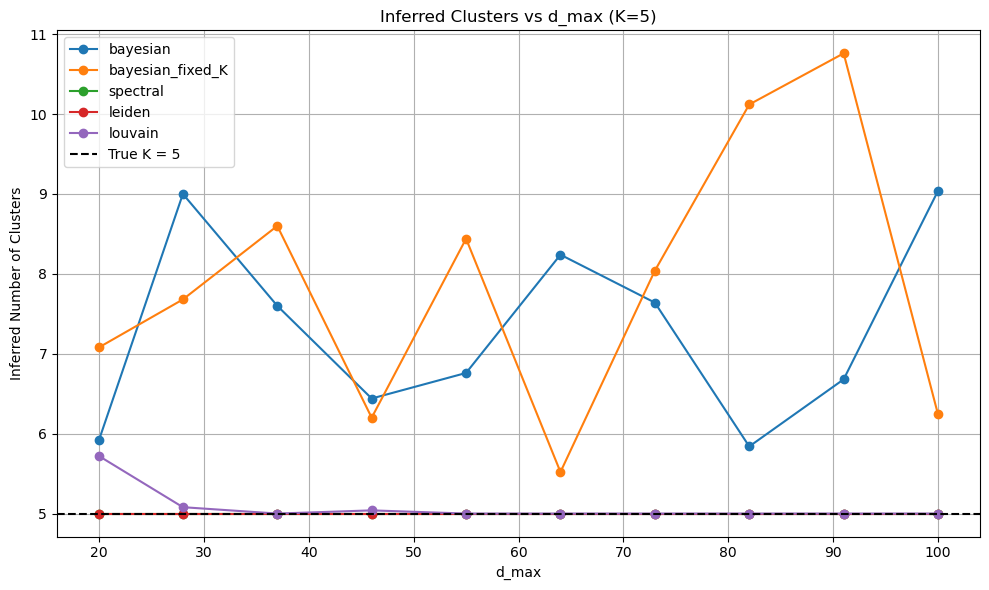

In [9]:
res_dmax = validation_range_d_max(num_graphs=10, xi_max = 0.4)

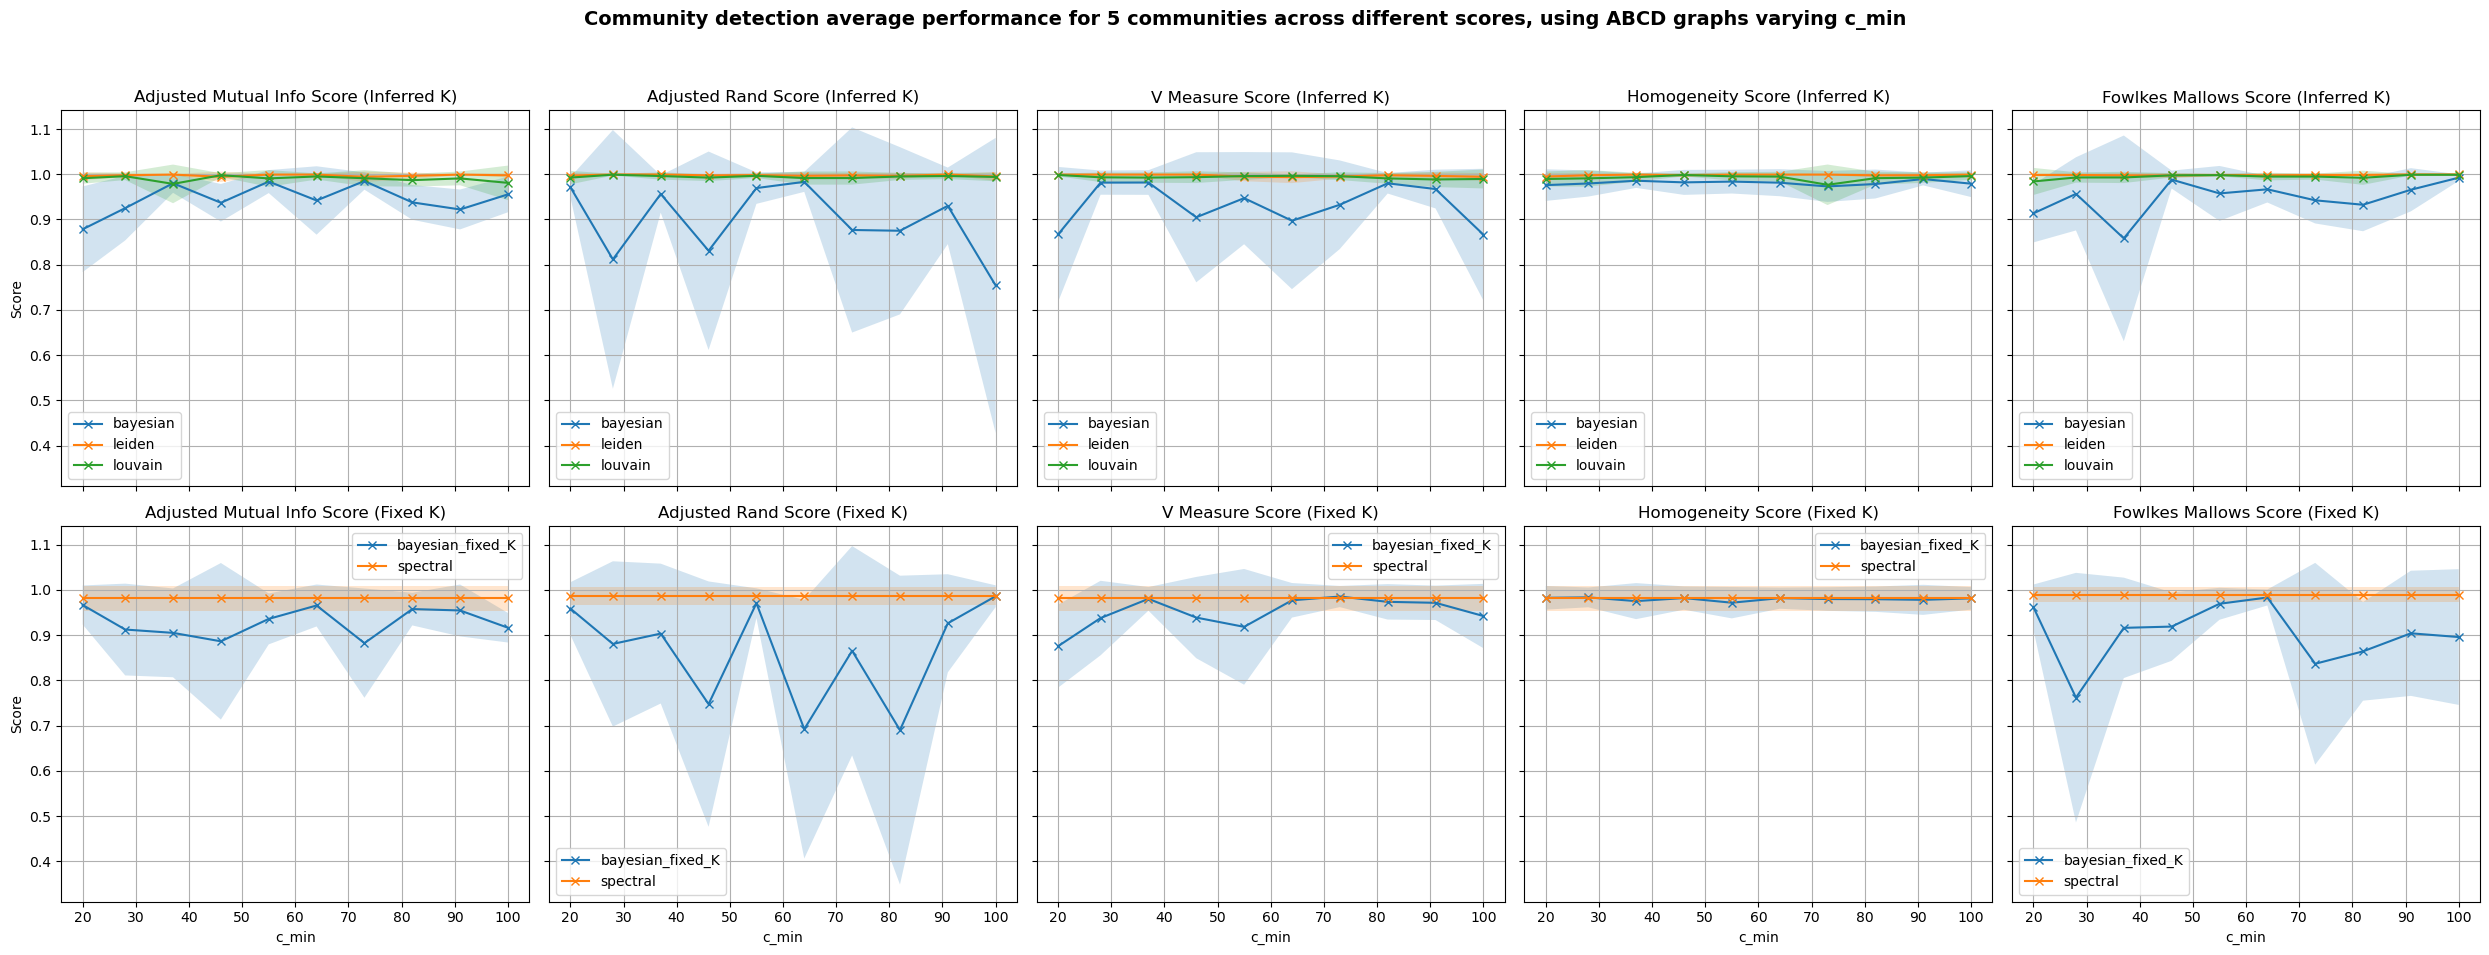

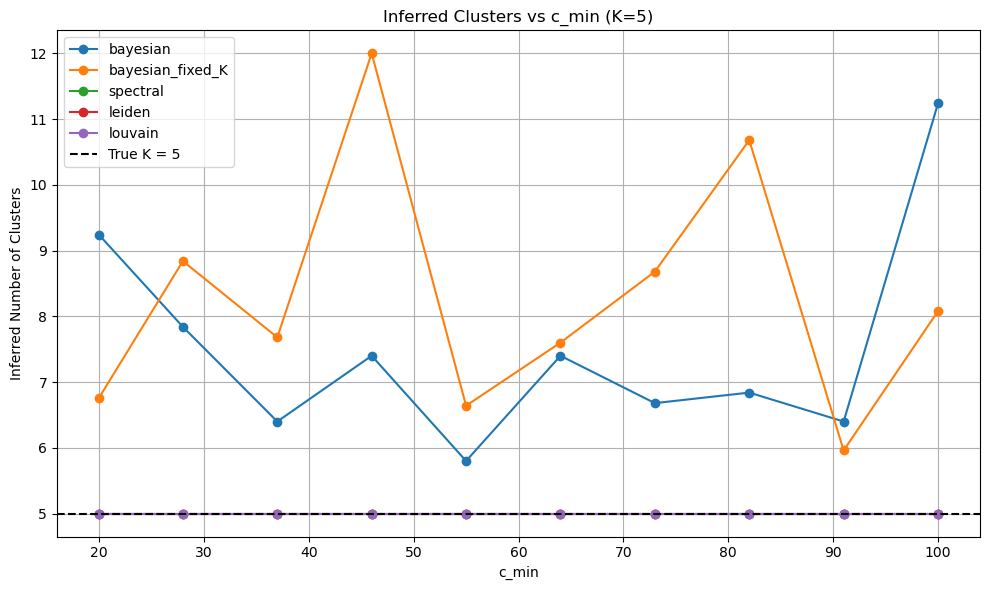

In [10]:
res_cmin = validation_range_c_min(num_graphs=10, xi_max = 0.4)